In [1]:
import sys
import os
import json
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Tools import *
from Clusters import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
method = "dbsan"
def train(name, data, decay = 10):
    model = DBSCAN(data, 0.5)
    centroids, labels = model()
    print(centroids)
    print(labels)
    s_score = silhouette_score(data, labels, metric='euclidean')
    d_score = davies_bouldin_score(data, labels)
    print(s_score)
    print(d_score)
    np.save(f'../Lib/Centroids/{name}_{method}.npy', centroids)
    np.save(f'../Lib/Labels/{name}_{method}.npy', labels)
    result = {
        "silhouette_score": s_score,
        "davies_bouldin_index": d_score
    }
    with open(f'../Lib/Score/{name}_{method}.json', 'w', encoding='utf-8') as rank:
        json.dump(result, rank, ensure_ascii=False, indent=4)
    return (centroids, labels), (s_score, d_score)

def visualize(name, index, data, centroids, labels, labels_name): 
    indexs = [item for item in range(len(labels_name)) if item != index]
    X_reduced = data
    final_centroids_reduced = centroids
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    axes[0].scatter(X_reduced[:, index], X_reduced[:, indexs[0]], c=labels, cmap='viridis', s=50)
    axes[0].scatter(final_centroids_reduced[:, index], final_centroids_reduced[:, indexs[0]], c='red', s=200, alpha=0.75, marker='X')
    axes[0].set_xlabel(f'{labels_name[index]}')
    axes[0].set_ylabel(f'{labels_name[indexs[0]]}')
    axes[0].set_title(f'{method} Clustering {labels_name[index]} & {labels_name[indexs[0]]}')

    axes[1].scatter(X_reduced[:, index], X_reduced[:, indexs[1]], c=labels, cmap='viridis', s=50)
    axes[1].scatter(final_centroids_reduced[:, index], final_centroids_reduced[:, indexs[1]], c='red', s=200, alpha=0.75, marker='X')
    axes[1].set_xlabel(f'{labels_name[index]}')
    axes[1].set_ylabel(f'{labels_name[indexs[1]]}')
    axes[1].set_title(f'{method} Clustering {labels_name[index]} & {labels_name[indexs[1]]}')

    fig.savefig(f'../Lib/Images/{name}_{labels_name[index]}_{method}.png', dpi=300, bbox_inches='tight')
    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# FoundationCourses

In [3]:
name_data = "FoundationCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

[[ 7.54317049  0.89125693  0.88206456]
 [10.88377193  0.9625      0.96447368]]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.4436915944624721
0.4057787492710645


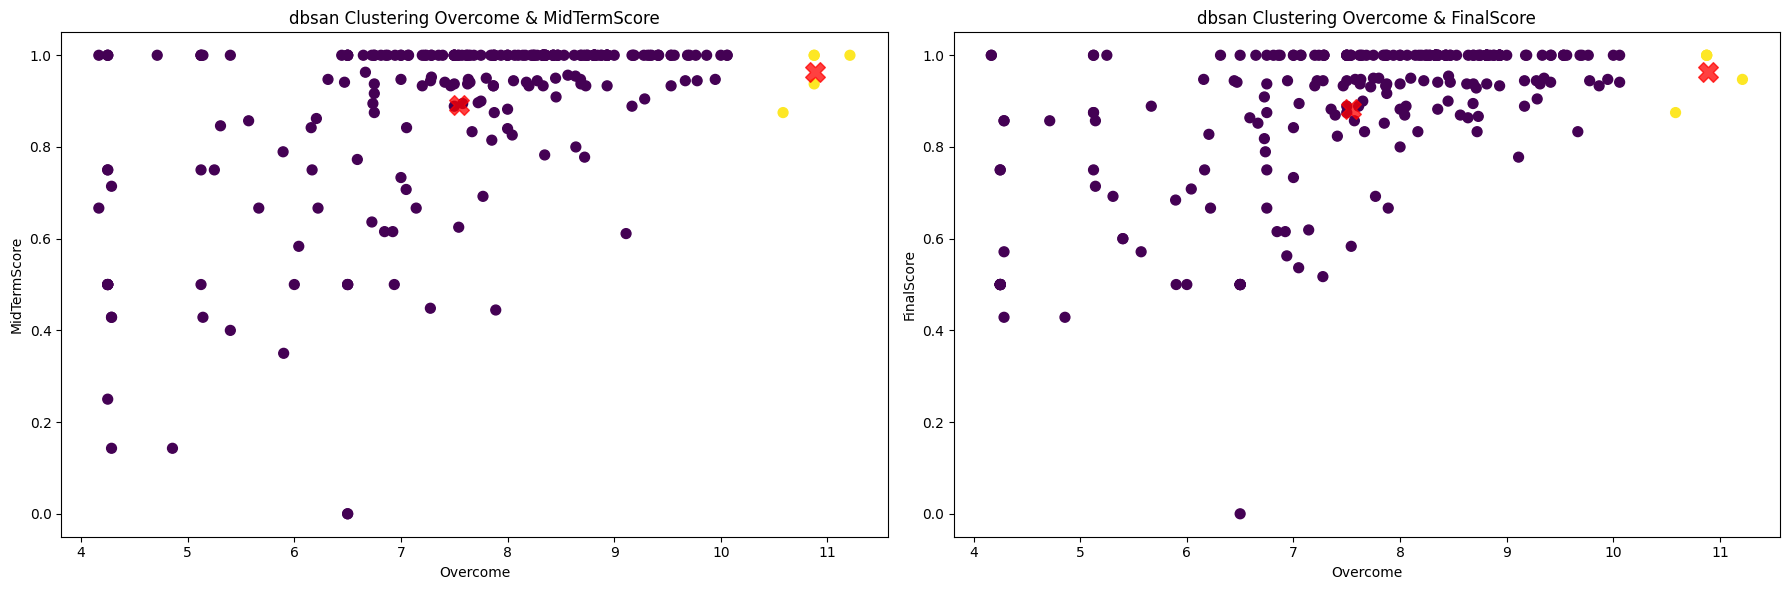

In [4]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

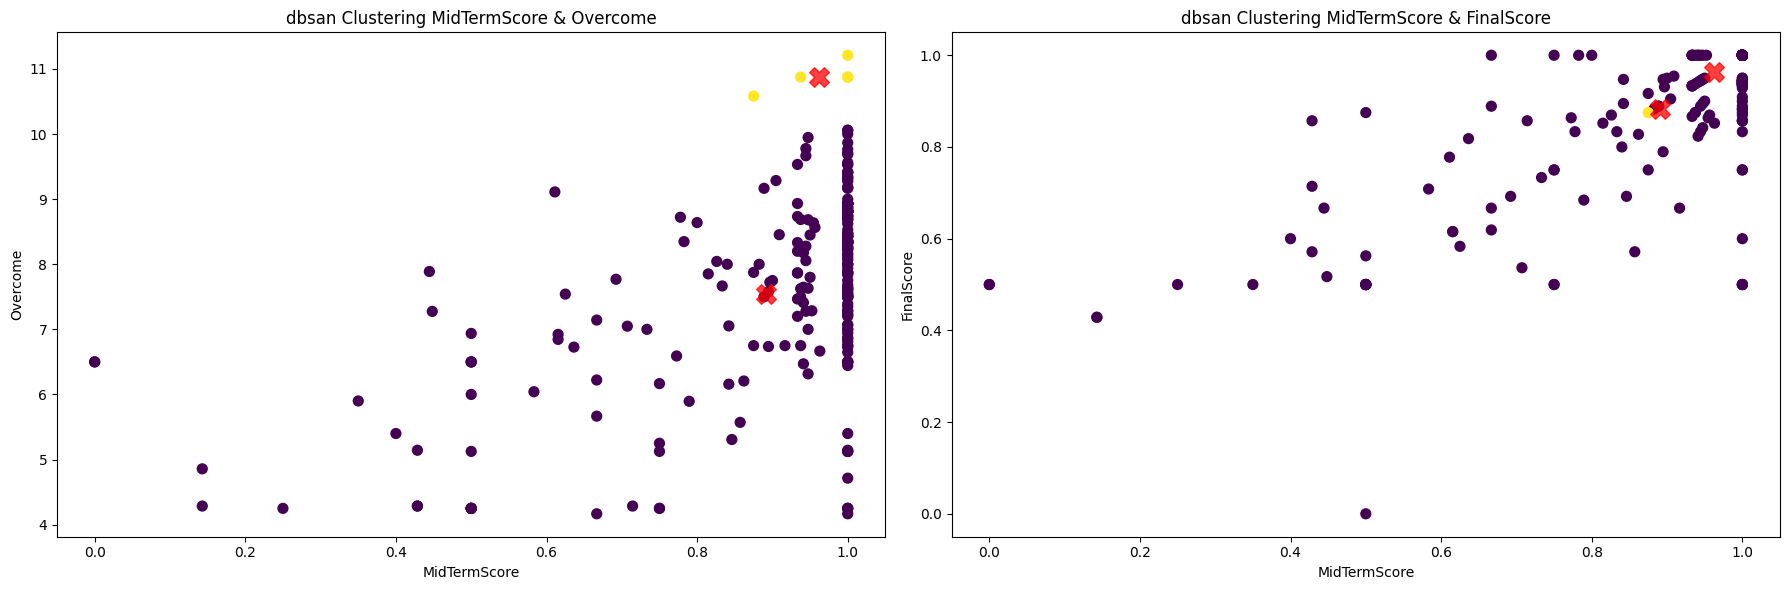

In [5]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

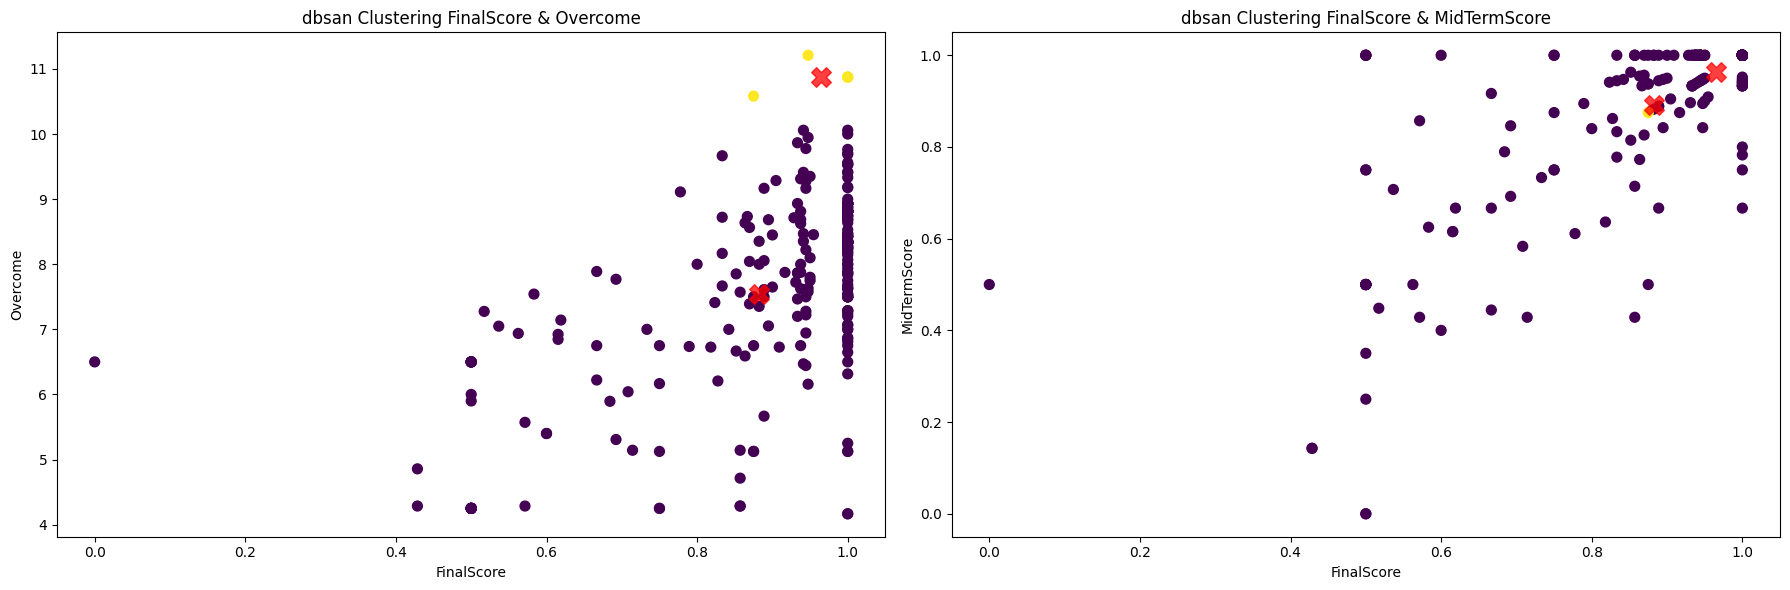

In [6]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)

# GeneralCourses

In [7]:
name_data = "GeneralCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

[[ 8.35304838  0.95710034  0.9801425 ]
 [ 2.5         0.47222222  0.61111111]
 [12.77447552  1.          1.        ]
 [ 3.72444444  0.77555556  0.90444444]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 1 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.31524319957534813
0.38620588435672165


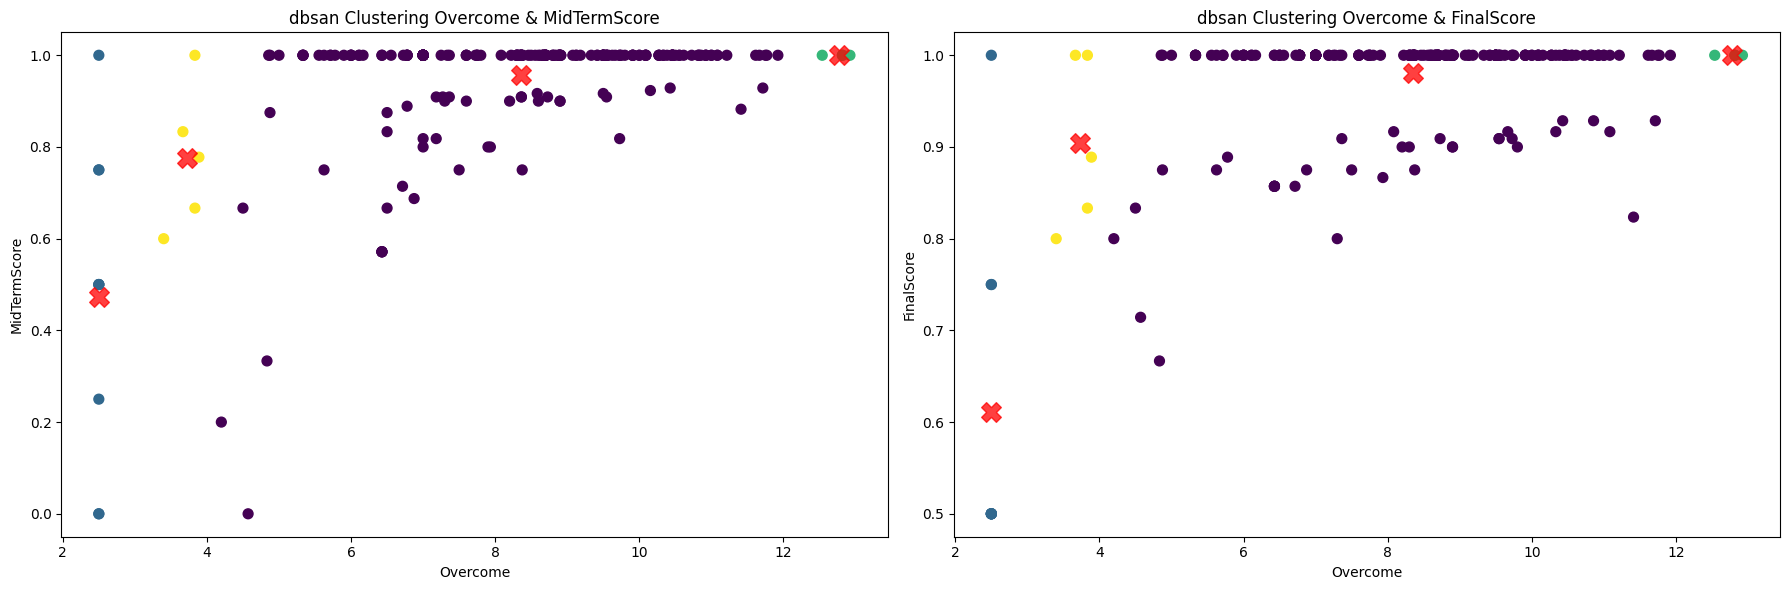

In [8]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

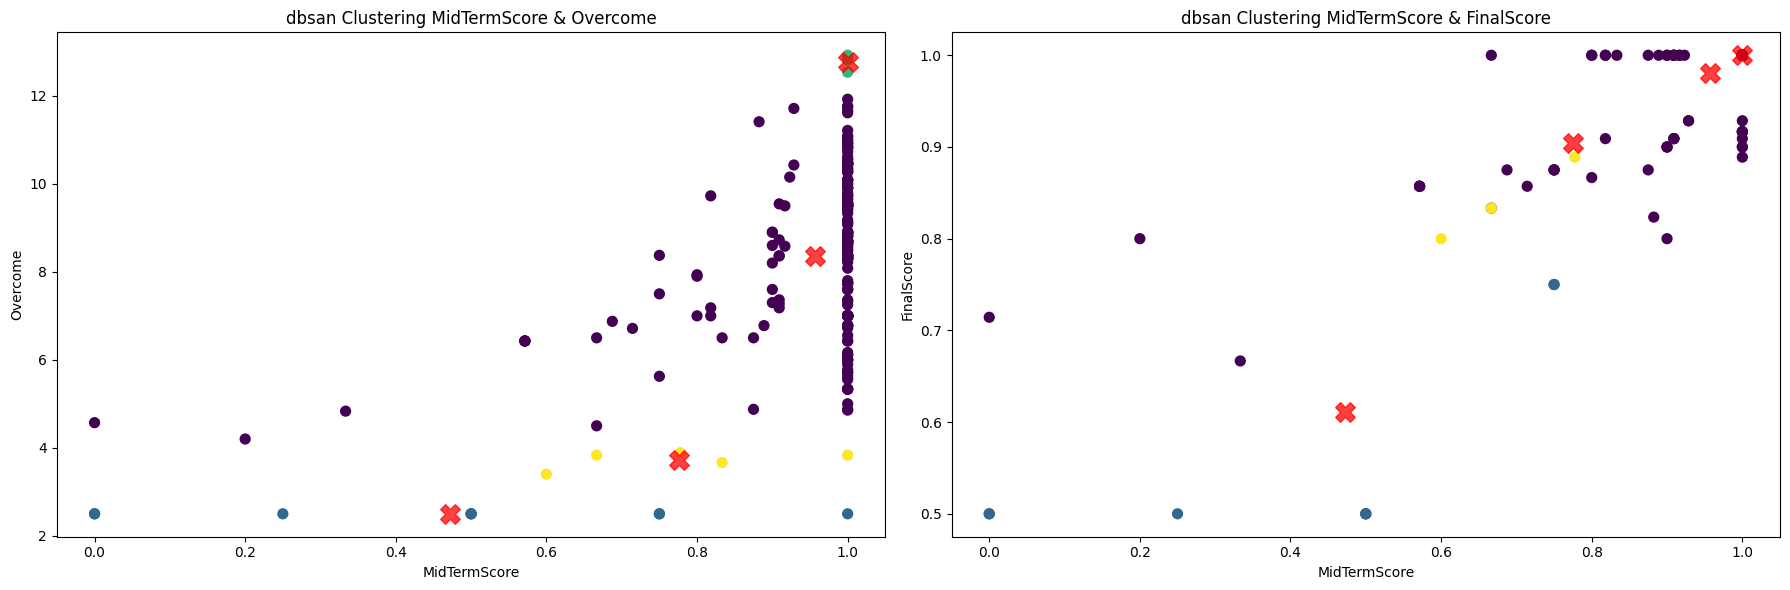

In [9]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

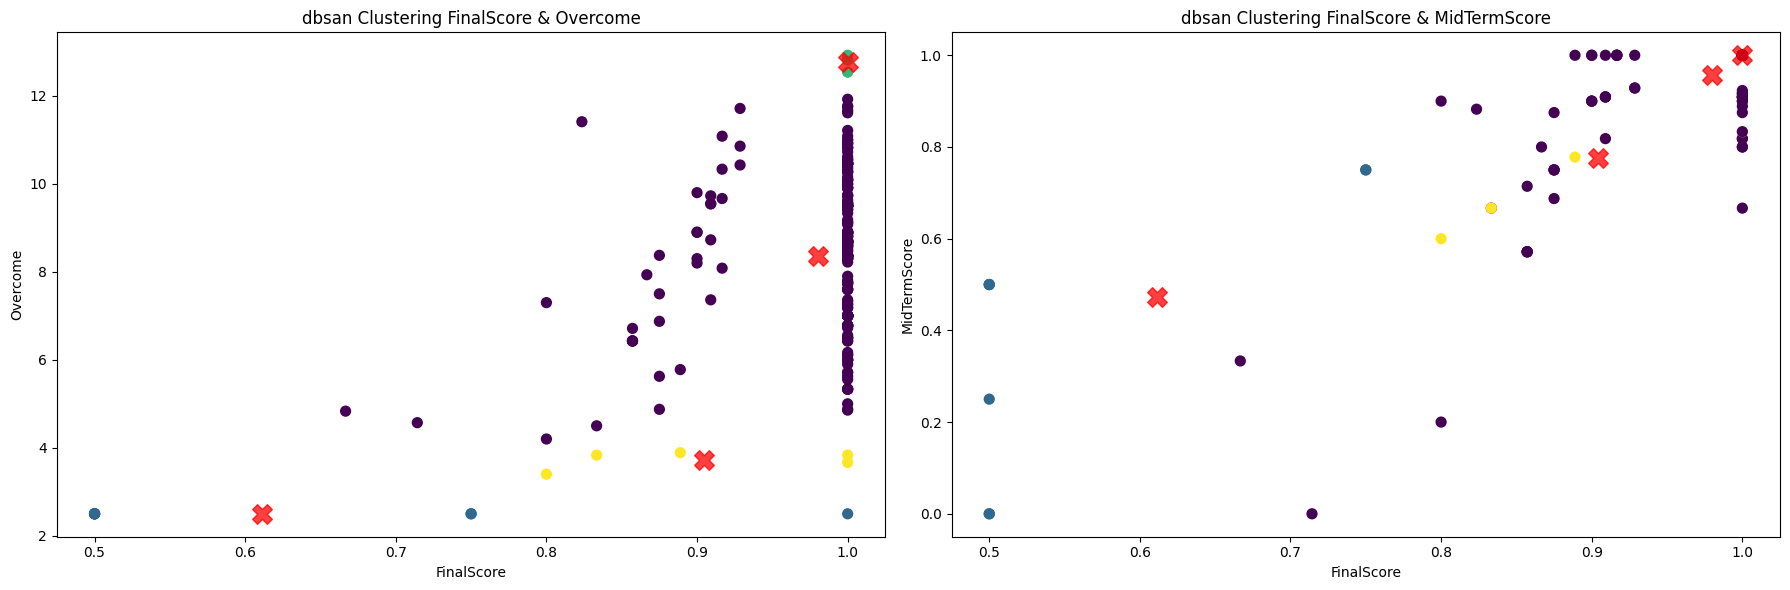

In [10]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)

# MajorCourses

In [11]:
name_data = "MajorCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

[[ 1.          1.          1.        ]
 [13.64090807  0.98559985  0.97654558]
 [17.28276723  0.98484848  0.98484848]
 [ 1.          0.          0.        ]
 [ 7.8         0.9         0.85454545]
 [ 2.44444444  1.          0.88888889]
 [21.375       1.          1.        ]
 [18.54470418  0.98571429  1.        ]
 [ 8.35        0.55        0.5       ]
 [ 1.          1.          0.        ]
 [19.87519911  1.          0.98958333]
 [        nan         nan         nan]]
[ 0  1  2  1  3  1  1  1  1  4  1  5  1  1  1  1  0  1  1  1  1  1  1 -1
  1  1  5  1 -1  6  1  1  1  1  1  1  1  3  1  7  7  1  1  1  3  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  7  1 -1  8  9  0  1  1  1  1  1  1  1
  7  1  1 -1  1  1  1  1  1  1  1  1  1 10  6  1  1  1  1  1 10  1  1  1
  1  1  1  2 -1  1  1  1  8 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  2  3  7  1  1  1  1  1  1 -1  1  1  1  1  2  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  2  1  1  2  0  1  1  1  1  1  1  1  1  1
  1  1 10  1  1  1  

d:\Work\Master\Master_DataMining\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Work\Master\Master_DataMining\.venv\Lib\site-packages\numpy\_core\_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


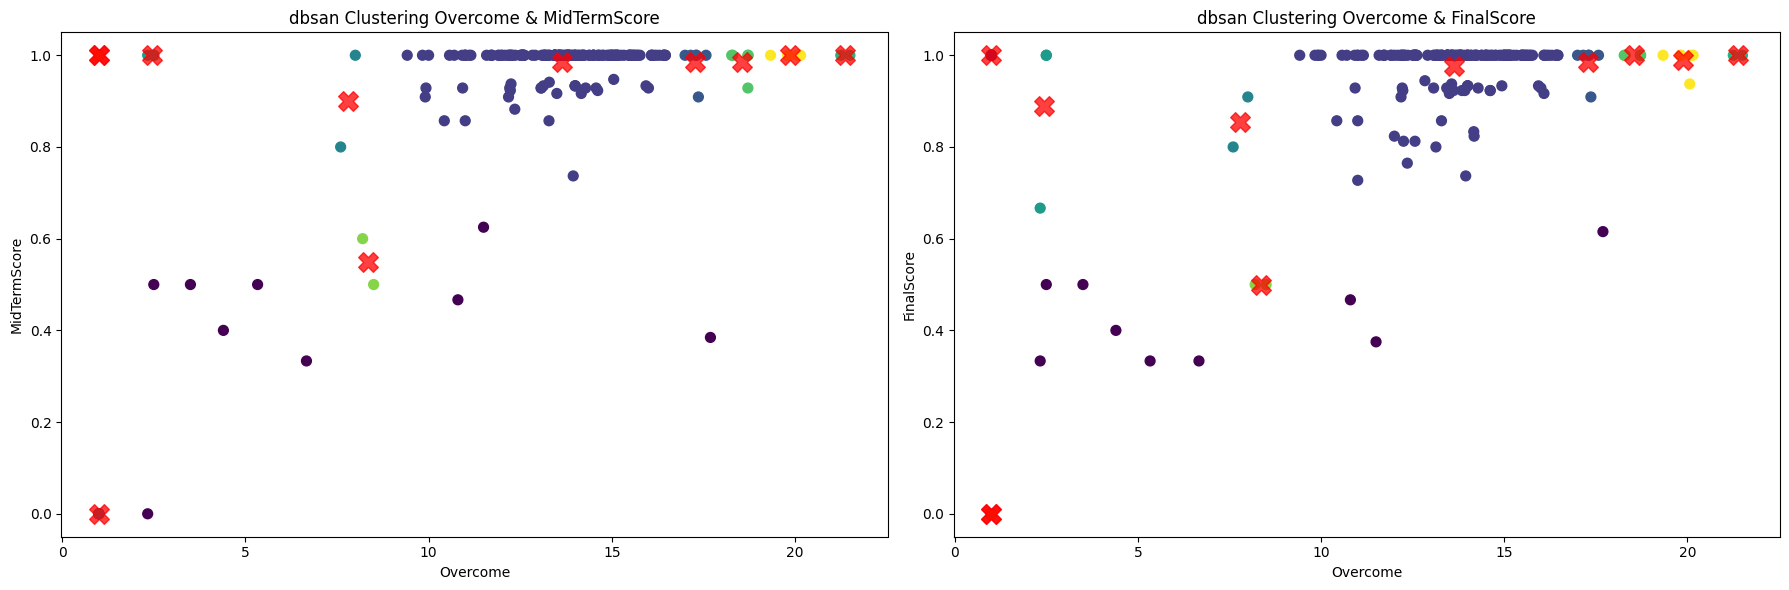

In [12]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

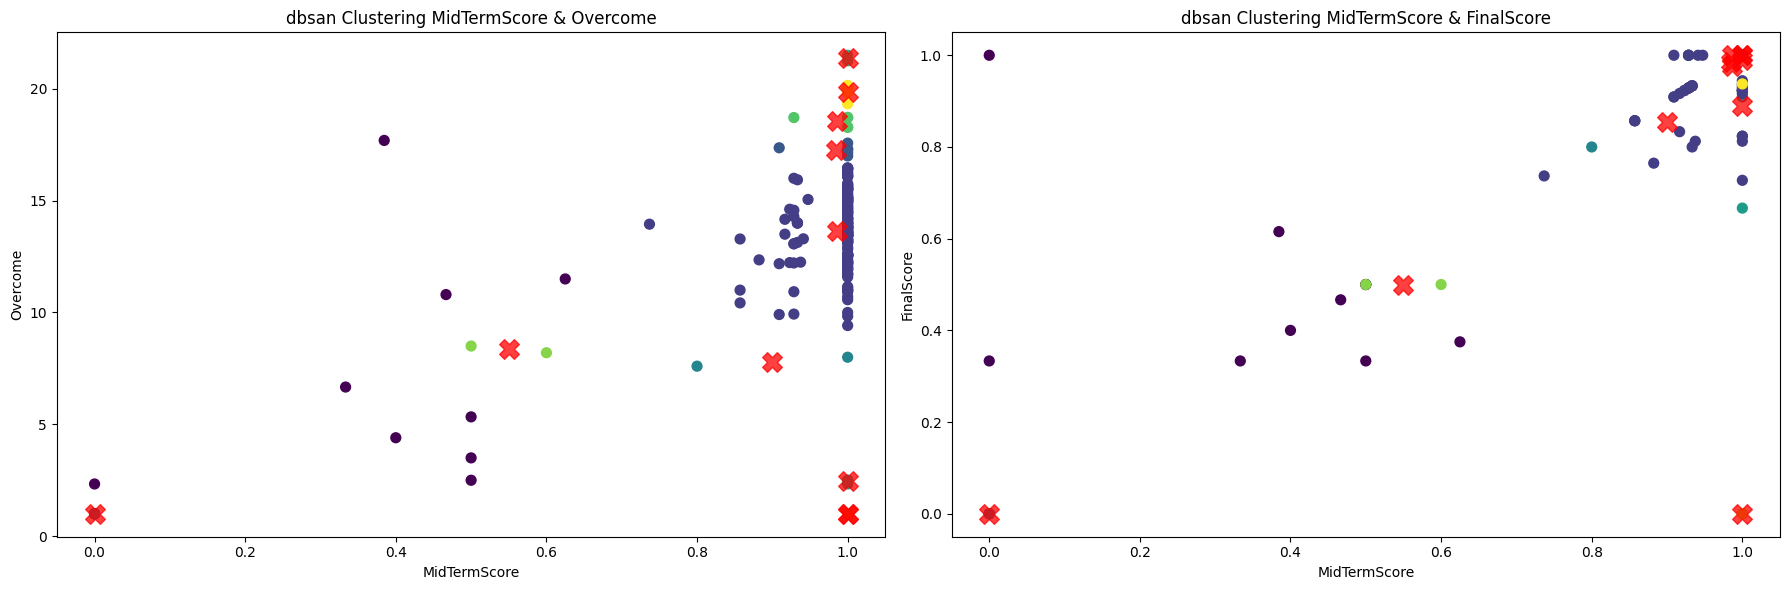

In [13]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

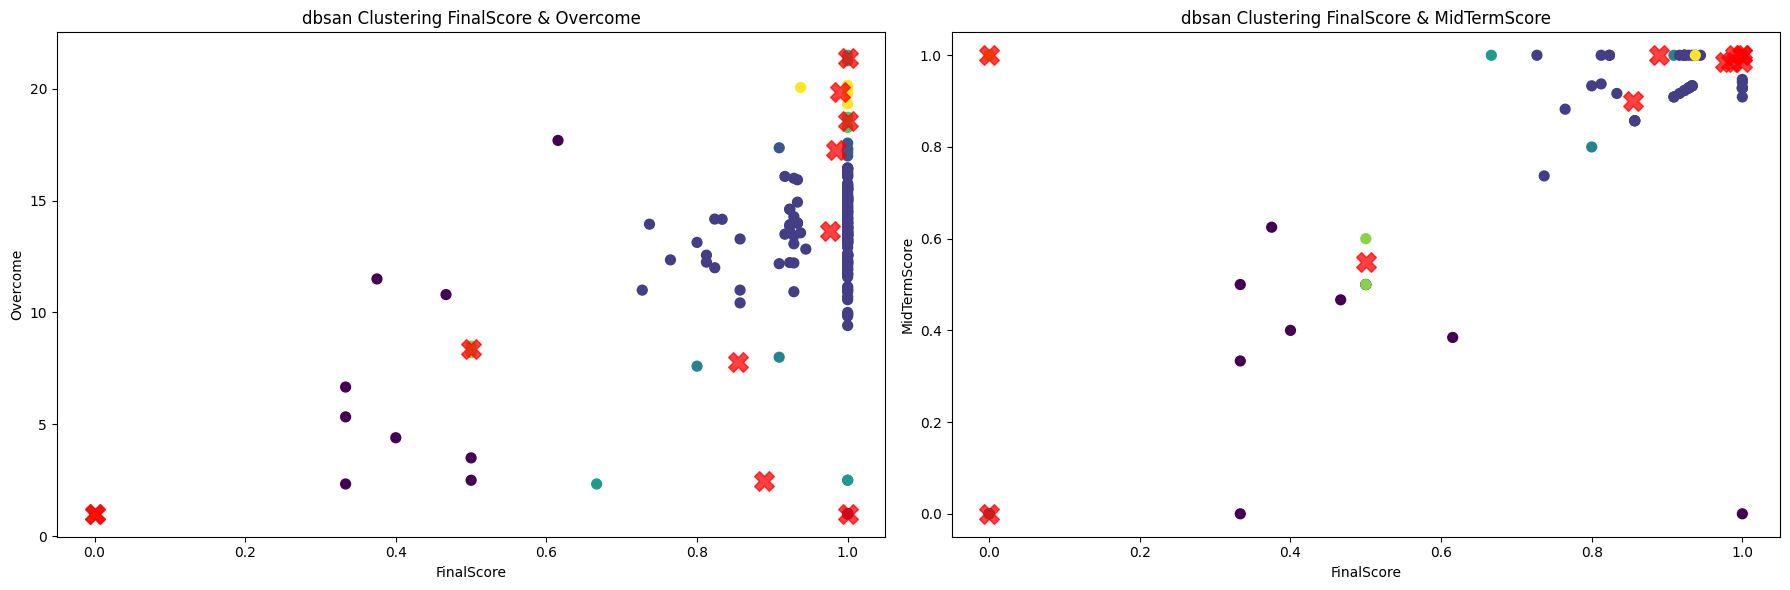

In [14]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)